In [1]:
import sys
sys.path.append('./CoursePythonCode')
import matplotlib.pyplot as plt

from CoursePythonCode.Chapter3 import ImputationMissingValues
from Chapter3.ImputationMissingValues import ImputationMissingValues
from CoursePythonCode.Chapter3 import OutlierDetection
from util.VisualizeDataset import VisualizeDataset
#from CoursePythonCode.Chapter3 import VisualizeDataset
import copy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as md
from util import util

plt.rcParams["figure.figsize"] = [20,15]


# Question 3.3

In [2]:
#Data
df = pd.read_csv('./datasets/csv-participant-one/intermediate_datafiles/chapter2_result.csv', index_col=0)
df.index = pd.to_datetime(df.index)

./CoursePythonCode/util/VisualizeDataset.py:123: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plot.hold(True)
/opt/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:910: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/opt/anaconda2/lib/python2.7/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/opt/anaconda2/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pa

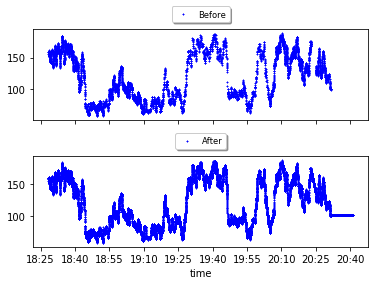

In [3]:
# Take the heart rate as attribute
col = 'hr_watch_rate'

# Make imputation and visualization instance
MissingValues = ImputationMissingValues()
DataViz = VisualizeDataset()

# Use interpolation function 
df_imputed_interpolation = MissingValues.impute_interpolate(copy.deepcopy(df),col)

# Visualize result
DataViz.plot_imputed_values(df, ['Before', 'After'], 'hr_watch_rate', df_imputed_interpolation['hr_watch_rate'])

# Question 3.2

In [4]:
from Chapter3.OutlierDetection import DistributionBasedOutlierDetection

col = 'light_phone_lux'
OutlierDistr = DistributionBasedOutlierDetection()

./CoursePythonCode/util/VisualizeDataset.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_table[outlier_col] = data_table[outlier_col].astype('bool')
./CoursePythonCode/util/VisualizeDataset.py:97: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plot.hold(True)
./CoursePythonCode/util/VisualizeDataset.py:106: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plot.hold(False)


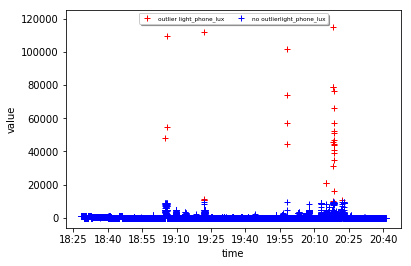

In [5]:
dataset_outliers_chauvenet = OutlierDistr.chauvenet(df, col)
DataViz.plot_binary_outliers(dataset_outliers_chauvenet, col, col + '_outlier')

In [6]:
#dataset_outliers_mixture = OutlierDistr.mixture_model(df, col)
#DataViz.plot_dataset(dataset_outliers_mixture, [col, col + '_mixture'], ['exact','exact'], ['line', 'points'])

In [7]:
#Distance-based: Simple distance-based approach
from Chapter3.OutlierDetection import DistanceBasedOutlierDetection

OutlierDist = DistanceBasedOutlierDetection()

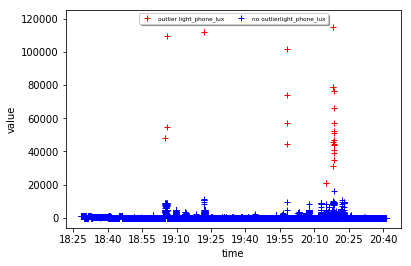

In [8]:
dataset_outliers_sdb = OutlierDist.simple_distance_based(df, [col], 'euclidean', 0.10, 0.99)
DataViz.plot_binary_outliers(dataset_outliers_sdb, col, 'simple_dist_outlier')

./CoursePythonCode/util/VisualizeDataset.py:36: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plot.hold(True)


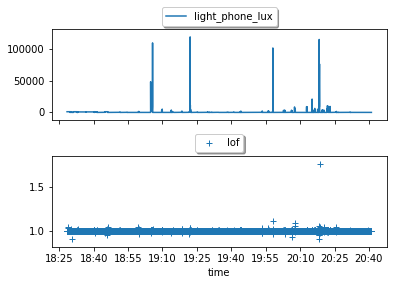

In [ ]:
#Distance-based: Local outlier factor
for k in [1,5,10,20]:
    dataset_outliers_lof = OutlierDist.local_outlier_factor(df, [col], 'euclidean', k)
    DataViz.plot_dataset(dataset_outliers_lof, [col, 'lof'], ['exact','exact'], ['line', 'points'])